1 Import and Install Dependencies

In [1]:
!pip install tensorflow==2.5.1 tensorflow-gpu==2.5.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np  #help with arrays
import os       #makes is eaier t work with file paths
from matplotlib import pyplot as plt   #visualize images
import time       #to take a sleep between  each frame that we collect
import mediapipe as mp

2 Keypoint Using MP Holistic

In [2]:
#two variables one for mediapipe holistics and one for mediapipe drawing utilities
#holistics will be downloading that model and levaraging the model
# the drawing utility is going to make it easier to draw the keypoints on our face
mp_holistic = mp.solutions.holistic #holistic model
mp_drawing = mp.solutions.drawing_utils #drawing utilities

In [3]:
#function to make our detection
#variable for image and model
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion bgr to rgb
    image.flags.writeable = False                  #sets our image writable status to false, our image is ....
    results = model.process(image)                 #make prediction
    image.flags.writeable = True                   #image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion rgb to bgr
    return image, results                          

In [4]:
def draw_landmarks(image, results):
    #helper function that comes with mediapipe that makes it easier to draw landmarks onto an image
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)#Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)#draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)#draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)#draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    #Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    #draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )        #first line to color landmark(dot) the second colors connection(line)
    #draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    #draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [8]:
mp_drawing.draw_landmarks??
#landmark drawing spec-what formatting to be applied to the dots and effectively the joins
#connection drawing spec-what format to be applied to the connections

In [7]:
results

mediapipe.python.solution_base.SolutionOutputs

In [8]:
draw_landmarks(frame, results)

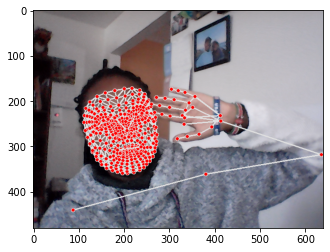

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
#ensure we can access our webcam using opencv
#apply a secondary layer where we are actually going to make detections using media pipe
cap = cv2.VideoCapture(0) #effectively accessing our webcam
#access or set the mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #double checking that we're still accesing our webcam and loop through all our frames in our webcam
   
    while cap.isOpened():
        #Read feed from our webcam
        ret, frame = cap.read()
        
        #make detections
        image, results = mediapipe_detection(frame, holistic)
        
        #Draw landmarks
        draw_styled_landmarks(image, results)
        
        #print(results)
        #show to the user
        cv2.imshow('Feed', image)
        
        #breaking gracefully going to wait for a key to be pressed inside of our frame
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release() #releases our webcam
    cv2.destroyAllWindows() #closes down our frame

3 Extract Keypoint Values

In [10]:
len(results.pose_landmarks.landmark)

33

In [11]:
results.pose_landmarks.landmark[0].x

0.32407259941101074

In [12]:
pose = []
#extracted kepoint for poselandmake and stored in an array
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
#creating a list rather than a loop 
#puts its all in obe big array - flatten
#extracting arrays x,y,z the flattening it
#if we dont have results we are going to replace it with a balnk numpy array
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
len(results.left_hand_landmarks.landmark)

21

In [15]:
#replacing landamrk values with zeros in situations where we don't get landmark values
#we are still passing an array with the same shape
np.zeros(21*3).shape

(63,)

In [16]:
lh.shape

(63,)

In [17]:
pose

array([ 3.24072599e-01,  5.52306950e-01, -1.33716691e+00,  9.99893427e-01,
        3.55221391e-01,  4.78116065e-01, -1.26445448e+00,  9.99640524e-01,
        3.75700533e-01,  4.74513650e-01, -1.26402593e+00,  9.99738097e-01,
        3.92579168e-01,  4.72262383e-01, -1.26355839e+00,  9.99615133e-01,
        2.81679541e-01,  4.95546997e-01, -1.25881326e+00,  9.99625564e-01,
        2.58680373e-01,  5.01452744e-01, -1.25790286e+00,  9.99699056e-01,
        2.42673606e-01,  5.07880569e-01, -1.25812840e+00,  9.99553323e-01,
        4.22090471e-01,  4.93418604e-01, -7.81909943e-01,  9.99750257e-01,
        2.21004054e-01,  5.42910933e-01, -7.21144438e-01,  9.99754608e-01,
        3.73164177e-01,  6.28416717e-01, -1.15712428e+00,  9.99815285e-01,
        2.91890115e-01,  6.43306732e-01, -1.13955712e+00,  9.99742508e-01,
        5.95969439e-01,  7.53546000e-01, -5.12980103e-01,  9.99217093e-01,
        1.38462946e-01,  9.18473244e-01, -3.53502244e-01,  9.94215786e-01,
        9.94562745e-01,  

In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [19]:
result_test = extract_keypoints(results) #[:10]

In [20]:
result_test

array([ 0.3240726 ,  0.55230695, -1.33716691, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
np.save('0', result_test)  #saving each frame as a np array

In [22]:
np.load('0.npy') #load up array

array([ 0.3240726 ,  0.55230695, -1.33716691, ...,  0.        ,
        0.        ,  0.        ])

4 Set Up Folders for collection

In [23]:
#keypoints will form our frame values
#the extracted keypoints to decodebour sign language

#variable that holds path for exported data, numpy arrays
DATA_PATH =  os.path.join('MP_DATA')
#actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou','walk', 'eat','run','drink'])
#thirty videos worth of data
no_sequences = 30
#videos are going to be thirty frames in length
sequence_length = 30

In [24]:
#folder for each action
#hello
## 0 sequence of actions 
## 1
## 2 ....
## 29
#thanks
#iloveyou
#markedirs is going to make the subdirectories as well for each video
#folder called mp data(data_path), subfolder for actions, and a sequence folder
#if folders are already created we are going to skip

In [25]:
#create folders that are going to store our data
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

5 Collecting Keypoint values for keypoint values for training and testing

In [106]:
#loop through and take a snapshot at each point in time
#loop through each one of our actions
#30 frames per video, for 30 videos, 3 times for each action

cap = cv2.VideoCapture(0) #effectively accessing our webcam
#access or set the mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # loop through action
    for action in actions:
        #loop through sequences aka videos
        for sequence in range(no_sequences):
            #loop through video length aka sequence length
            for frame_num in range(sequence_length):
        
                #read feed
                ret, frame = cap.read()
                #make detections
                image, results = mediapipe_detection(frame, holistic)

                #Draw landmarks
                draw_styled_landmarks(image, results)
                
                #apply collection logic
                if frame_num == 0: #at frame zero we take a break
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), #position
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA) #line width, line type
                    #show to the user
                    cv2.imshow('Feed', image)
                    cv2.waitKey(2000)
                #if not at frame 0
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    #show to the user
                    cv2.imshow('Feed', image)
                
                #Export keypoints and save them in our folders
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                

                
               
                #breaking gracefully going to wait for a key to be pressed inside of our frame
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release() #releases our webcam
    cv2.destroyAllWindows() #closes down our frame

In [32]:
cap.release() #releases our webcam
cv2.destroyAllWindows() #closes down our frame

6 Prepocess Data and get labels and features

In [68]:
from sklearn.model_selection import train_test_split # allow us to partion our data into a training and test partion
from tensorflow.keras.utils import to_categorical   #to convert data into one hot encoded data

In [69]:
#created our label map
#creating a dictionary that has  the label hello, thanks and iloveyou
#looing through our actions
label_map = {label:num for num, label in enumerate(actions)}

In [70]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'walk': 3,
 'eat': 4,
 'run': 5,
 'drink': 6}

In [71]:
#blank arrays sequences represent feature data(x data), labels represents labels(y data)
#use features and train a model to represent the relationship between our labels
sequences, labels = [], [] 
for action in actions:
    for sequence in range(no_sequences):
        window = []    #all different frames for that particular sequence
        for frame_num in range(sequence_length):
            #load up that frame by passing the full path to a differeny numpy array   frame number and add it to the windwo
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        #after a video is done append to the sequences
        sequences.append(window)
        #appending the label and using the label map and passing it through our action
        labels.append(label_map[action])

In [72]:
np.array(sequences).shape

(210, 30, 1662)

In [73]:
np.array(labels).shape

(210,)

In [74]:
#preprocessing this to get it into a format that we can start working with
X = np.array(sequences)

In [75]:
X.shape

(210, 30, 1662)

In [76]:
y = to_categorical(labels).astype(int)

In [77]:
#converted our initial labels to a one hot encoded representation
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [78]:
y.shape

(210, 7)

In [79]:
#Training and testing partition
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05) #test partition is going to be 5% of our data

In [80]:
y_train.shape

(199, 7)

7 Build and Train LSTM Neural Network

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard #allows us to form some logging inside of tensor board if we want to go and trace and monitor the model as it is training

In [82]:
#create a log directory and set up our tensorflow callback
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [83]:
#neural network architecture
model = Sequential()   #instantiating the model
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662))) #64 lstm units, return sequences coz the next layer will need them
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [84]:
res1=[0.7, 0.2, 0.1]
res1
np.argmax(res1)
actions[np.argmax(res1)]

'hello'

In [140]:
#compile the model and fit it
#loss-multiclass classification model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [141]:
#fit and train our model
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
7/7 [==============================] - 10s 984ms/step - loss: 1.6490 - categorical_accuracy: 0.4171
Epoch 2/2000
7/7 [==============================] - 0s 58ms/step - loss: 1.1539 - categorical_accuracy: 0.4925
Epoch 3/2000
7/7 [==============================] - 0s 59ms/step - loss: 0.9584 - categorical_accuracy: 0.6683
Epoch 4/2000
7/7 [==============================] - 0s 58ms/step - loss: 0.8025 - categorical_accuracy: 0.6432
Epoch 5/2000
7/7 [==============================] - 0s 59ms/step - loss: 0.6325 - categorical_accuracy: 0.7437
Epoch 6/2000
7/7 [==============================] - 0s 59ms/step - loss: 0.6001 - categorical_accuracy: 0.7437
Epoch 7/2000
7/7 [==============================] - 0s 58ms/step - loss: 0.5670 - categorical_accuracy: 0.7337
Epoch 8/2000
7/7 [==============================] - 0s 57ms/step - loss: 0.5425 - categorical_accuracy: 0.7638
Epoch 9/2000
7/7 [==============================] - 0s 58ms/step - loss: 0.5419 - categorical_accuracy: 0.7588

KeyboardInterrupt: 

In [142]:
#what our model looks like
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 231       
Total params: 683,079
Trainable params: 683,079
Non-trainable params: 0
________________________________________________

8 Make predictions

In [143]:
res=model.predict(X_test)

In [144]:
actions[np.argmax(res[0])]

'thanks'

In [145]:
actions[np.argmax(y_test[1])]

'drink'

In [146]:
actions[np.argmax(y_test[2])]

'eat'

#### Save weights

In [147]:
model.save('action.h5')

In [51]:
 #del  model

In [148]:
#load weghts
model.load_weights('action.h5')

Evaluation using Confusion Matrix and Accuracy

In [149]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
#mmultilabel gives us a confusion matrix for each of our labels evaluates what is being detected as a true positive and true negative and a false positive and false negative


In [150]:
yhat = model.predict(X_test)

In [151]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [152]:
yhat

[1, 6, 6, 1, 0, 5, 4, 1, 6, 6, 6]

In [153]:
ytrue

[5, 6, 4, 1, 0, 5, 3, 1, 6, 4, 6]

In [154]:
multilabel_confusion_matrix(ytrue, yhat)
#confusion matrix of the shape 2,2

array([[[10,  0],
        [ 0,  1]],

       [[ 8,  1],
        [ 0,  2]],

       [[10,  0],
        [ 1,  0]],

       [[ 8,  1],
        [ 2,  0]],

       [[ 9,  0],
        [ 1,  1]],

       [[ 6,  2],
        [ 0,  3]]], dtype=int64)

In [155]:
accuracy_score(ytrue, yhat)

0.6363636363636364

11 Test in Realtime

In [156]:
colors = [(125,117,16), (177,245,16), (16,117,245),(110,180,16), (190,245,16), (50,170,245), (80,117,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

In [128]:
#plt.figure(figsize=(18,18))
#plt.imshow(prob_viz(res, actions, image, colors))

In [171]:
#New detection variables
sequence = [] #collect our 30 frames inorder to genarate our prediction
sentence = [] #allows us to concatenate our history of predictions
threshold = 0.5 #confidence matrix we rendor results above a certain threshold

cap = cv2.VideoCapture(0) 

#access or set the mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #double checking that we're still accesing our webcam and loop through all our frames in our webcam
   
    while cap.isOpened():
        #Read feed from our webcam
        ret, frame = cap.read()
        
        #make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #Draw landmarks
        draw_styled_landmarks(image, results)
        
        #2. Prediction logic
        keypoints = extract_keypoints(results) #
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            #running our prediction
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)]) 
        
        
        #Visualization logic
        if (res[np.argmax(res, axis=0)] > threshold).any():   #
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    #sentence.append(actions[np.argmax(res#, axis=0)])
                    sentence.append(actions[np.argmax(res) % len(actions)])
            else:
                #sentence.append(actions[np.argmax(res#, axis=0)])
                sentence.append(actions[np.argmax(res) % len(actions)])
                

                    
        if len(sentence) > 5:
            sentence = sentence[-5:]
            
        #viz probabilities
        #image = prob_viz(res, actions, image, colors)
         
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA) 
        
        
        
        #print(results)
        #show to the user
        cv2.imshow('Feed', image)
        
        #breaking gracefully going to wait for a key to be pressed inside of our frame
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release() #releases our webcam
    cv2.destroyAllWindows() #closes down our frame

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


IndexError: index 22 is out of bounds for axis 0 with size 7

In [167]:
cap.release()
cv2.destroyAllWindows()

In [168]:
model.predict(X_test)

array([[1.83456393e-07, 9.88657653e-01, 4.80686253e-07, 9.68761469e-07,
        2.63469701e-07, 1.13264462e-02, 1.40169986e-05],
       [3.79520073e-03, 2.71362974e-03, 6.67078467e-03, 7.75816515e-02,
        4.17854518e-01, 9.19934595e-04, 4.90464300e-01],
       [9.83076519e-04, 7.88093370e-04, 8.21793079e-03, 2.96614021e-02,
        3.61235350e-01, 2.18410074e-04, 5.98895848e-01],
       [7.34656747e-14, 9.99996662e-01, 7.87528896e-13, 1.16925014e-12,
        1.49634454e-11, 3.37593133e-06, 5.48606405e-09],
       [6.11334026e-01, 1.19323879e-04, 1.24373827e-02, 2.79181123e-01,
        9.36737210e-02, 1.38884760e-04, 3.11562303e-03],
       [9.74831743e-11, 2.45867134e-03, 4.20669721e-09, 1.03249596e-08,
        6.80900784e-14, 9.97541308e-01, 1.32406405e-10],
       [8.03569425e-03, 3.59978015e-03, 1.11383954e-02, 1.44057959e-01,
        4.16205376e-01, 1.65402610e-03, 4.15308714e-01],
       [5.00140596e-09, 9.99543846e-01, 3.83811560e-08, 3.79717164e-08,
        1.07176533e-07, 4

In [169]:
np.expand_dims(X_test[0], axis=1).shape

(30, 1, 1662)

In [170]:
res[np.argmax(res)] > threshold

IndexError: index 22 is out of bounds for axis 0 with size 11

In [162]:
print(np.argmax(res))

22


In [172]:
print(np.argmax(res))
print(res)

22
[[1.83456393e-07 9.88657653e-01 4.80686253e-07 9.68761469e-07
  2.63469701e-07 1.13264462e-02 1.40169986e-05]
 [3.79520073e-03 2.71362974e-03 6.67078467e-03 7.75816515e-02
  4.17854518e-01 9.19934595e-04 4.90464300e-01]
 [9.83076519e-04 7.88093370e-04 8.21793079e-03 2.96614021e-02
  3.61235350e-01 2.18410074e-04 5.98895848e-01]
 [7.34656747e-14 9.99996662e-01 7.87528896e-13 1.16925014e-12
  1.49634454e-11 3.37593133e-06 5.48606405e-09]
 [6.11334026e-01 1.19323879e-04 1.24373827e-02 2.79181123e-01
  9.36737210e-02 1.38884760e-04 3.11562303e-03]
 [9.74831743e-11 2.45867134e-03 4.20669721e-09 1.03249596e-08
  6.80900784e-14 9.97541308e-01 1.32406405e-10]
 [8.03569425e-03 3.59978015e-03 1.11383954e-02 1.44057959e-01
  4.16205376e-01 1.65402610e-03 4.15308714e-01]
 [5.00140596e-09 9.99543846e-01 3.83811560e-08 3.79717164e-08
  1.07176533e-07 4.52059467e-04 3.98049497e-06]
 [7.36439135e-04 8.83167901e-04 5.97527483e-03 2.70351078e-02
  3.42694759e-01 2.36771419e-04 6.22438431e-01]
 [5.685

In [136]:
print(len(actions))  # Should output 7

7


In [164]:
print(actions.shape)

(7,)


In [165]:
print(res.shape)

(11, 7)
